In [1]:
# Data and math
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier, VotingClassifier

# ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
# Read CSV
df = pd.read_csv("/content/voice.csv")

# Preview
print(df.shape)
df.head()

(3168, 21)


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [4]:
df.isnull().sum()



,0
meanfreq,0
sd,0
median,0
Q25,0
Q75,0
IQR,0
skew,0
kurt,0
sp.ent,0
sfm,0


In [5]:
df.duplicated().sum()

np.int64(2)

label
male      1584
female    1584
Name: count, dtype: int64


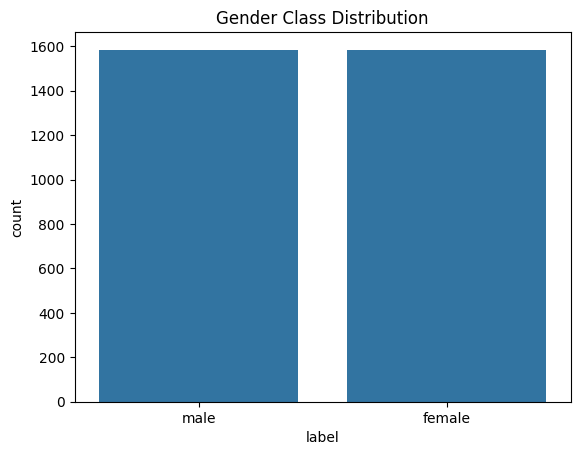

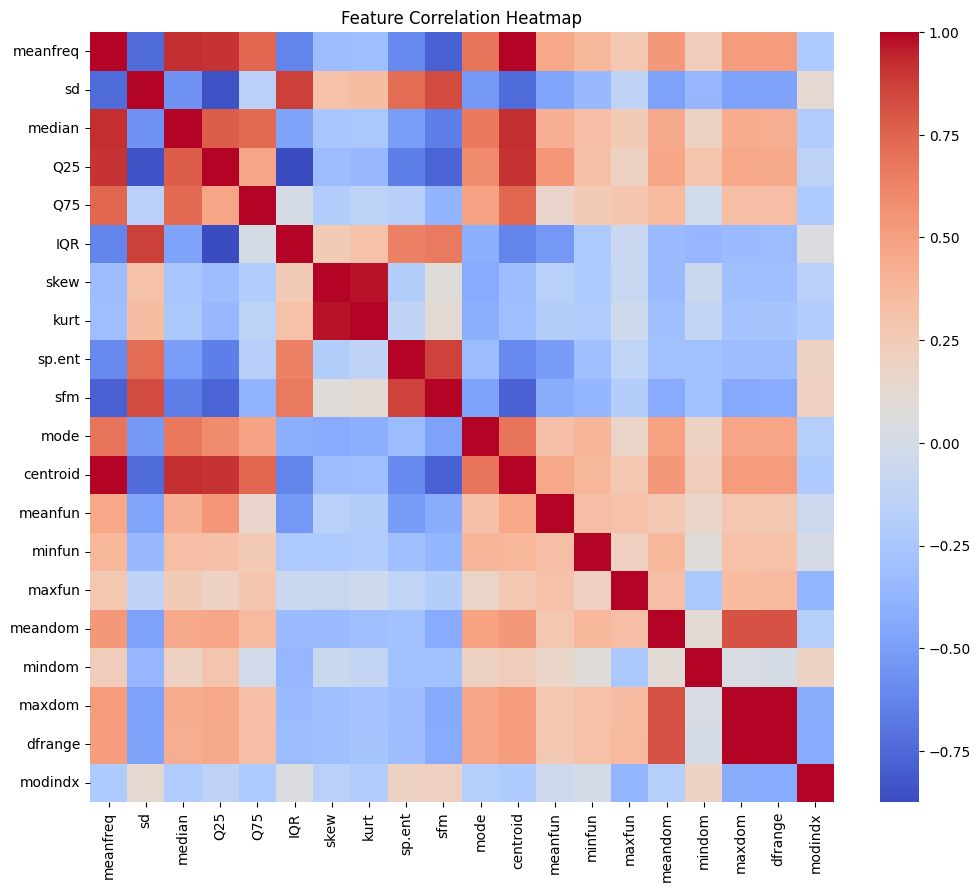

In [6]:
# Class distribution
print(df['label'].value_counts())
sns.countplot(x='label', data=df)
plt.title('Gender Class Distribution')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.drop(columns='label').corr(), cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [7]:
# Encode target
df['label_num'] = df['label'].map({'male': 0, 'female': 1})

# Features + target
X = df.drop(columns=['label', 'label_num'])
y = df['label_num']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Select top 10 features
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X_scaled, y)
selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features.tolist())

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.25, stratify=y, random_state=42
)


Selected features: ['meanfreq', 'sd', 'median', 'Q25', 'IQR', 'sp.ent', 'sfm', 'centroid', 'meanfun', 'maxdom']


In [8]:
def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    print(f"--- {name} ---")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    return acc


--- KNN ---
Accuracy: 0.9773
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       396
           1       0.98      0.97      0.98       396

    accuracy                           0.98       792
   macro avg       0.98      0.98      0.98       792
weighted avg       0.98      0.98      0.98       792



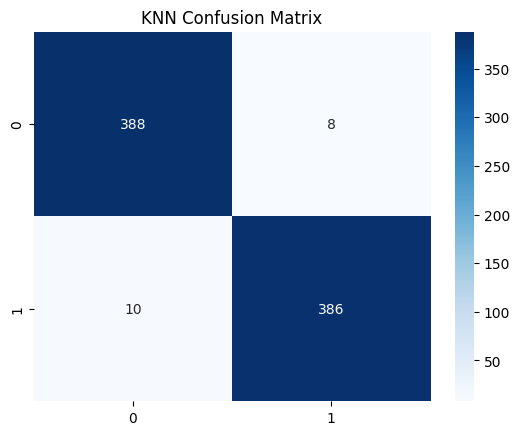

In [9]:
knn = KNeighborsClassifier(n_neighbors=7, metric='manhattan')
knn.fit(X_train, y_train)
acc_knn = evaluate_model("KNN", y_test, knn.predict(X_test))

--- SVM ---
Accuracy: 0.9545
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       396
           1       0.98      0.93      0.95       396

    accuracy                           0.95       792
   macro avg       0.96      0.95      0.95       792
weighted avg       0.96      0.95      0.95       792



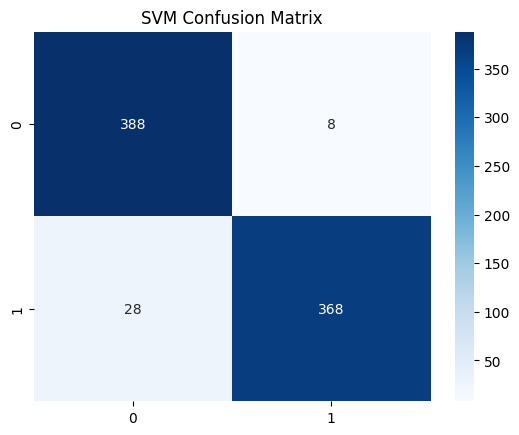

In [10]:
svm = SVC(C=10, gamma=0.0001, kernel='rbf')
svm.fit(X_train, y_train)
acc_svm = evaluate_model("SVM", y_test, svm.predict(X_test))

--- Random Forest ---
Accuracy: 0.9747
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       396
           1       0.97      0.98      0.97       396

    accuracy                           0.97       792
   macro avg       0.97      0.97      0.97       792
weighted avg       0.97      0.97      0.97       792



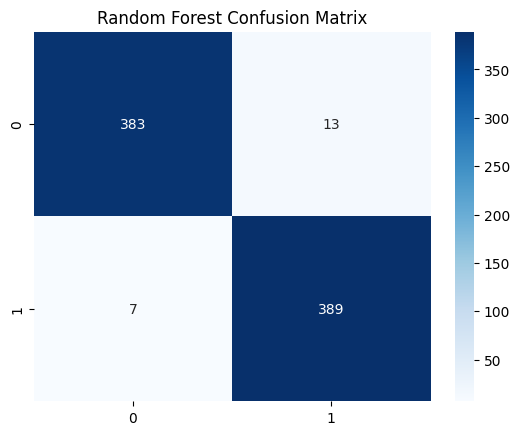

In [11]:
rf = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=42)
rf.fit(X_train, y_train)
acc_rf = evaluate_model("Random Forest", y_test, rf.predict(X_test))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:40:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


--- XGBoost ---
Accuracy: 0.9773
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       396
           1       0.97      0.99      0.98       396

    accuracy                           0.98       792
   macro avg       0.98      0.98      0.98       792
weighted avg       0.98      0.98      0.98       792



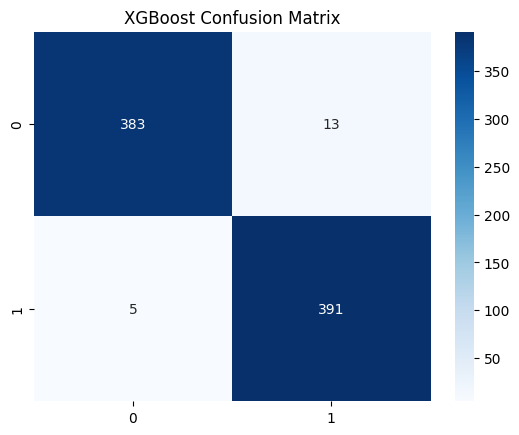

In [12]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
acc_xgb = evaluate_model("XGBoost", y_test, xgb.predict(X_test))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:40:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:40:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


--- Stacking Ensemble ---
Accuracy: 0.9760
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       396
           1       0.97      0.99      0.98       396

    accuracy                           0.98       792
   macro avg       0.98      0.98      0.98       792
weighted avg       0.98      0.98      0.98       792



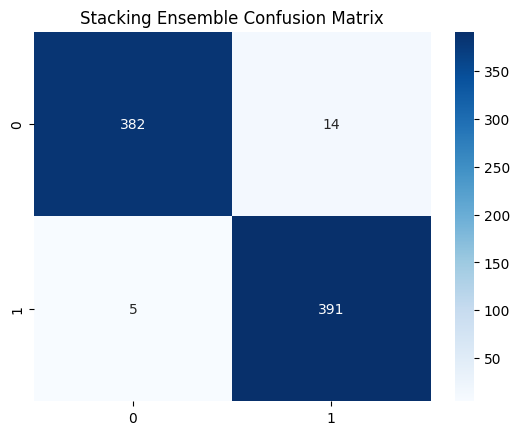

In [13]:
stack = StackingClassifier(
    estimators=[
        ('svm', SVC(C=10, gamma=0.0001, kernel='rbf', probability=True)),
        ('rf', RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=42)),
        ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
    ],
    final_estimator=SVC()
)
stack.fit(X_train, y_train)
acc_stack = evaluate_model("Stacking Ensemble", y_test, stack.predict(X_test))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:40:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


--- Voting Ensemble ---
Accuracy: 0.9747
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       396
           1       0.97      0.98      0.97       396

    accuracy                           0.97       792
   macro avg       0.97      0.97      0.97       792
weighted avg       0.97      0.97      0.97       792



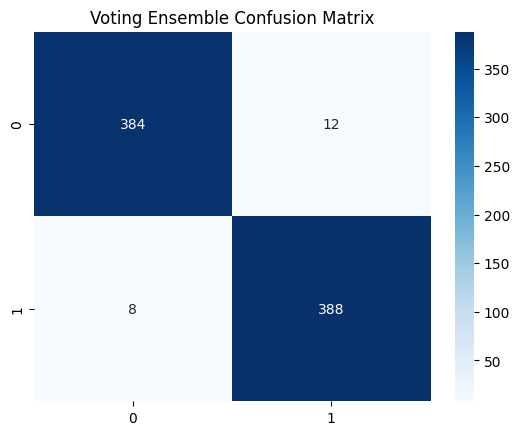

In [14]:
vote = VotingClassifier(
    estimators=[
        ('svm', svm),
        ('rf', rf),
        ('xgb', xgb)
    ],
    voting='hard'
)
vote.fit(X_train, y_train)
acc_vote = evaluate_model("Voting Ensemble", y_test, vote.predict(X_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
--- ANN ---
Accuracy: 0.9823
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       396
           1       0.98      0.99      0.98       396

    accuracy                           0.98       792
   macro avg       0.98      0.98      0.98       792
weighted avg       0.98      0.98      0.98       792



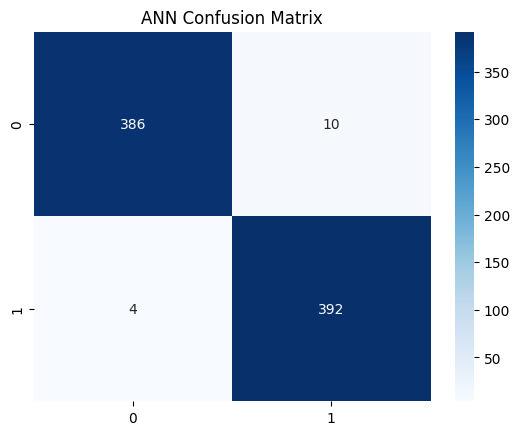

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Predict and evaluate
ann_pred = (model.predict(X_test) > 0.5).astype(int).flatten()
acc_ann = evaluate_model("ANN", y_test, ann_pred)

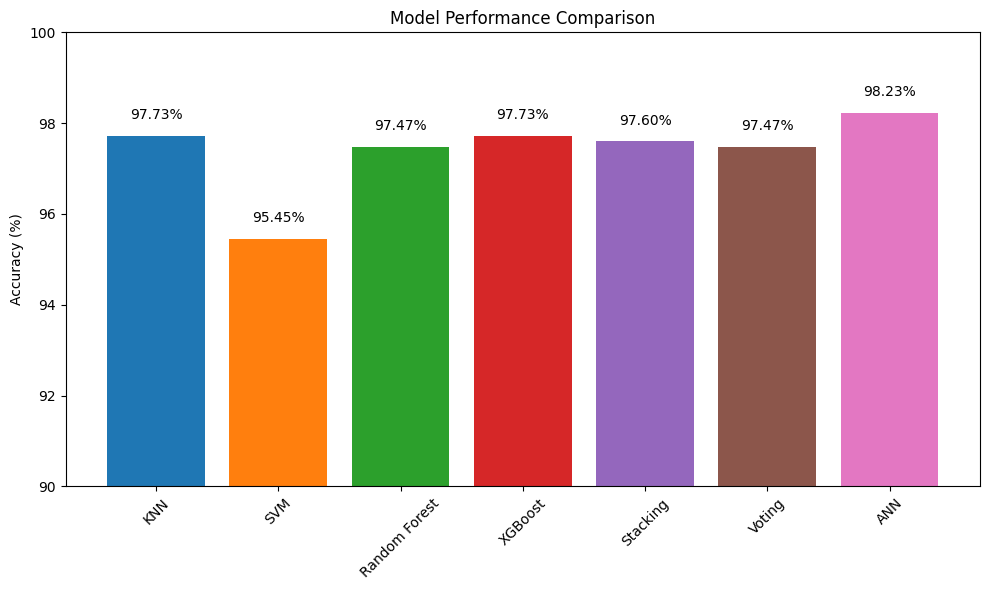

           Model  Accuracy (%)
0            KNN     97.727273
1            SVM     95.454545
2  Random Forest     97.474747
3        XGBoost     97.727273
4       Stacking     97.601010
5         Voting     97.474747
6            ANN     98.232323


In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Results dictionary (ensure values are defined)
results = {
    "KNN": acc_knn,
    "SVM": acc_svm,
    "Random Forest": acc_rf,
    "XGBoost": acc_xgb,
    "Stacking": acc_stack,
    "Voting": acc_vote,
    "ANN": acc_ann
}

# Accuracy values and colors
models = list(results.keys())
accuracies = [v * 100 for v in results.values()]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Create plot
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=colors)
plt.ylabel("Accuracy (%)")
plt.title("Model Performance Comparison")
plt.xticks(rotation=45)
plt.ylim(90, 100)

# Add text labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.3, f"{yval:.2f}%", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Print DataFrame
print(pd.DataFrame({
    "Model": models,
    "Accuracy (%)": accuracies
}))
